In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy import stats
plt.rcParams['font.family'] = 'NanumGothic'
df = pd.read_csv("../../../data/all_preprocessing_finish_without_entity.csv", encoding = "euc-kr")

In [296]:
use_col = df.iloc[:, 9:].isnull().sum().sort_values().head(15).index
a = df[use_col]
b = df.iloc[:,:9]
use_df = pd.concat([b, a], axis = 1)
use_df.drop(["자본과부채총계"], axis = 1,inplace = True)

In [300]:
df.iloc[:,9:].isnull().sum().sort_values().head(15)

자본과부채총계       0
비유동자산         0
유형자산          0
무형자산          0
자본총계          0
자산총계          0
유동부채          0
금융부채.1        0
금융부채          0
부채총계          0
현금및현금성자산      0
유동자산          0
금융자산          0
재고자산평가충당금    12
현재가치할인차금     22
dtype: int64

In [283]:
df = df.fillna(0)
df.shape

(11624, 180)

In [234]:
use_df = use_df.fillna(0)
data = use_df.iloc[:, 9:]

In [235]:
stats.shapiro(data["자산총계"])

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.10785448551177979, 0.0)

In [236]:
print(data["자산총계"].describe())
iqr = data["자산총계"].describe()["75%"] - data["자산총계"].describe()["25%"]
below_value = iqr*1.5 - data["자산총계"].describe()["25%"]
# above_value = iqr*1.5 + data["자산총계"].describe()["75%"]

# # 이상치 분리
above_df = use_df[use_df["자산총계"] > above_value]
below_df = use_df[use_df["자산총계"] <= above_value]

count    1.162400e+04
mean     1.914989e+12
std      1.285524e+13
min      2.643665e+09
25%      9.595927e+10
50%      2.006542e+11
75%      5.943326e+11
max      3.574575e+14
Name: 자산총계, dtype: float64


In [294]:
above_df.sort_values(by = "자산총계", ascending = False)

종목코드       회사명        시장구분     업종                업종명   결산월  \
4209  [005930]      삼성전자  유가증권시장상장법인  264.0     통신 및 방송 장비 제조업  12.0   
4207  [005930]      삼성전자  유가증권시장상장법인  264.0     통신 및 방송 장비 제조업  12.0   
4208  [005930]      삼성전자  유가증권시장상장법인  264.0     통신 및 방송 장비 제조업  12.0   
4205  [005930]      삼성전자  유가증권시장상장법인  264.0     통신 및 방송 장비 제조업  12.0   
4206  [005930]      삼성전자  유가증권시장상장법인  264.0     통신 및 방송 장비 제조업  12.0   
...        ...       ...         ...    ...                ...   ...   
4375  [038500]     삼표시멘트   코스닥시장상장법인  239.0    기타 비금속 광물제품 제조업  12.0   
2547  [000640]  동아쏘시오홀딩스  유가증권시장상장법인  649.0             기타 금융업  12.0   
3544  [009580]     무림P&P  유가증권시장상장법인  171.0    펄프, 종이 및 판지 제조업  12.0   
3548  [009580]     무림P&P  유가증권시장상장법인  171.0    펄프, 종이 및 판지 제조업  12.0   
4547  [017390]    서울도시가스  유가증권시장상장법인  352.0  연료용 가스 제조 및 배관공급업  12.0   

           결산기준일   보고서종류   통화          무형자산  ...         비유동자산          자본총계  \
4209  2020-03-31  1분기보고서  KRW  2.091239e+13  ...  1.707178e+14  2.663877e+14   
4207  2019-09-30  3분기보고서  KRW  1.570567e+13  ...  1.673439e+14  2.634422e+14   
4208  2019-12-31   사업보고서  KRW  2.070350e+13  ...  1.711792e+14  2.628804e+14   
4205  2019-03-31  1분기보고서  KRW  0.000000e+00  ...  1.676794e+14  2.532151e+14   
4206  2019-06-30   반기보고서  KRW  1.554303e+13  ...  1.695067e+14  2.577470e+14   
...          ...     ...  ...           ...  ...           ...           ...   
4375  2019-12-31   사업보고서  KRW  2.211056e+11  ...  1.127363e+12  6.352026e+11   
2547  2019-06-30   반기보고서  KRW  4.781930e+10  ...  1.018985e+12  7.342182e+11   
3544  2019-03-31  1분기보고서  KRW  1.081978e+10  ...  9.368851e+11  6.314599e+11   
3548  2020-03-31  1분기보고서  KRW  3.560040e+09  ...  9.384594e+11  6.066177e+11   
4547  2019-09-30  3분기보고서  KRW  8.151189e+09  ...  7.770661e+11  9.677738e+11   

              금융자산          유형자산          자산총계          유동부채  대손충당금(유동)  \
4209  7.987677e+13  1.216780e+14  3.574575e+14  6.476329e+13        0.0   
4207  7.131958e+13  1.168556e+14  3.533860e+14  6.330319e+13        0.0   
4208  7.797949e+13  1.198255e+14  3.525645e+14  6.378276e+13        0.0   
4205  7.993367e+13  1.163924e+14  3.450679e+14  6.735409e+13        0.0   
4206  6.239209e+13  1.166242e+14  3.429401e+14  5.930927e+13        0.0   
...            ...           ...           ...           ...        ...   
4375  3.390623e+09  8.697320e+11  1.346969e+12  2.643908e+11        0.0   
2547  5.800386e+11  4.079952e+11  1.344510e+12  3.816023e+11        0.0   
3544  2.404599e+11  7.622548e+11  1.344270e+12  4.421148e+11        0.0   
3548  3.017163e+11  7.270114e+11  1.344251e+12  4.015161e+11        0.0   
4547  6.354557e+11  5.679197e+11  1.343669e+12  1.402962e+11        0.0   

      대손충당금(비유동)  재고자산평가충당금  현재가치할인차금  
4209         0.0        0.0       0.0  
4207         0.0        0.0       0.0  
4208         0.0        0.0       0.0  
4205         0.0        0.0       0.0  
4206         0.0        0.0       0.0  
...          ...        ...       ...  
4375         0.0        0.0       0.0  
2547         0.0        0.0       0.0  
3544         0.0        0.0       0.0  
3548         0.0        0.0       0.0  
4547         0.0        0.0       0.0  

[1476 rows x 23 columns]

In [238]:
below_df.head(2)

종목코드 회사명       시장구분     업종            업종명  결산월       결산기준일  보고서종류   통화  \
0  [060310]  3S  코스닥시장상장법인  292.0  특수 목적용 기계 제조업  3.0  2017-03-31  사업보고서  KRW   
1  [060310]  3S  코스닥시장상장법인  292.0  특수 목적용 기계 제조업  3.0  2018-03-31  사업보고서  KRW   

           무형자산  ...         비유동자산          자본총계          금융자산          유형자산  \
0  1.706561e+09  ...  3.699404e+10  2.917967e+10  5.789006e+09  3.051267e+10   
1  1.391927e+09  ...  3.671933e+10  3.075234e+10  6.320016e+09  2.953049e+10   

           자산총계          유동부채  대손충당금(유동)  대손충당금(비유동)  재고자산평가충당금  현재가치할인차금  
0  5.370690e+10  1.535623e+10        0.0         0.0        0.0       0.0  
1  4.952100e+10  1.253908e+10        0.0         0.0        0.0       0.0  

[2 rows x 23 columns]

In [241]:
scaler = RobustScaler()
X = scaler.fit_transform(below_df.iloc[:,9:])
below_df.iloc[:,9:] = X
X_data = below_df.iloc[:,9:]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [242]:
stats.shapiro(X_data["유동자산"])

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.765863835811615, 0.0)

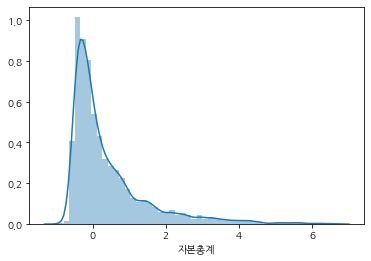

In [244]:
sns.distplot(X_data["자본총계"])

In [245]:
kmean = KMeans()
kmean.fit(X_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [247]:
cluster = kmean.predict(X_data)

In [277]:
X_data["cluster"] = cluster
X_data["cluster"].value_counts()
X_data.groupby(["cluster"]).agg("mean").sort_values(by = "자산총계")

무형자산      유동자산  현금및현금성자산      부채총계     비유동자산      자본총계  \
cluster                                                                
0         0.154400 -0.153837 -0.049059 -0.117852 -0.154055 -0.152592   
4         0.558147  0.972846  1.191586  0.903593  0.879867  0.987308   
7         3.133402  1.557232  2.934104  1.850094  0.705349  0.513944   
6         8.232217  1.073551  1.331982  1.355765  1.241146  1.020609   
2         1.536833  2.381345  2.149234  3.637291  2.883622  1.845586   
5         1.378857  1.997042  1.607653  2.095729  3.583209  3.471706   
3        23.787815  2.638356  2.347372  3.727420  3.585062  2.665961   
1        94.026101  0.647111  1.350281  2.828746  6.212507  4.181914   

             금융자산      유형자산      자산총계      유동부채  대손충당금(유동)  대손충당금(비유동)  \
cluster                                                                  
0        0.060024 -0.078162 -0.174875 -0.111338   0.040691    0.005801   
4        0.965105  1.043921  0.912181  0.900337   0.038999    0.027254   
7        3.143082 -0.087698  1.085807  2.191185  15.572046   32.737789   
6        0.978683  0.914491  1.136509  1.278012   0.009660    0.000000   
2        1.172669  3.522514  2.626526  3.560821   0.103155    0.000008   
5        9.256635  1.820275  2.809760  1.609348   0.027550   -0.017222   
3        2.491605  2.697556  3.114720  3.039104   0.775681    0.012960   
1        0.881595  0.604069  3.531082  1.305847   0.000000    0.000000   

         재고자산평가충당금  현재가치할인차금  
cluster                       
0         0.076346  0.000511  
4         0.186564  0.003137  
7         1.409597  0.294516  
6         0.015549  0.014668  
2         0.011465  0.217377  
5         0.000498  0.227717  
3         0.426808  0.000207  
1         0.000000  0.000000

In [280]:
df.iloc[X_data[X_data["cluster"] == 0].index, :]

종목코드 회사명       시장구분     업종                       업종명   결산월  \
0      [060310]  3S  코스닥시장상장법인  292.0             특수 목적용 기계 제조업   3.0   
1      [060310]  3S  코스닥시장상장법인  292.0             특수 목적용 기계 제조업   3.0   
2      [060310]  3S  코스닥시장상장법인  292.0             특수 목적용 기계 제조업   3.0   
3      [060310]  3S  코스닥시장상장법인  292.0             특수 목적용 기계 제조업   3.0   
4      [060310]  3S  코스닥시장상장법인  292.0             특수 목적용 기계 제조업   3.0   
...         ...  ..        ...    ...                       ...   ...   
11619  [037440]  희림  코스닥시장상장법인  721.0  건축기술, 엔지니어링 및 관련 기술 서비스업  12.0   
11620  [037440]  희림  코스닥시장상장법인  721.0  건축기술, 엔지니어링 및 관련 기술 서비스업  12.0   
11621  [037440]  희림  코스닥시장상장법인  721.0  건축기술, 엔지니어링 및 관련 기술 서비스업  12.0   
11622  [037440]  희림  코스닥시장상장법인  721.0  건축기술, 엔지니어링 및 관련 기술 서비스업  12.0   
11623  [037440]  희림  코스닥시장상장법인  721.0  건축기술, 엔지니어링 및 관련 기술 서비스업  12.0   

            결산기준일   보고서종류   통화  재무상태표 [abstract]  ...  퇴직급여운용자산/퇴직연금운용자산(부채)  \
0      2017-03-31   사업보고서  KRW               NaN  ...                    NaN   
1      2018-03-31   사업보고서  KRW               NaN  ...                    NaN   
2      2019-03-31   사업보고서  KRW               NaN  ...                    NaN   
3      2019-06-30  1분기보고서  KRW               NaN  ...                    NaN   
4      2019-09-30   반기보고서  KRW               NaN  ...                    NaN   
...           ...     ...  ...               ...  ...                    ...   
11619  2019-03-31  1분기보고서  KRW               NaN  ...                    NaN   
11620  2019-06-30   반기보고서  KRW               NaN  ...                    NaN   
11621  2019-09-30  3분기보고서  KRW               NaN  ...                    NaN   
11622  2019-12-31   사업보고서  KRW               NaN  ...                    NaN   
11623  2020-03-31  1분기보고서  KRW               NaN  ...                    NaN   

       퇴직보험예치금(부채)  이연법인세부채     기타비유동부채  비유동배출부채          부채총계  자본 [abstract]  \
0              NaN      NaN         NaN      NaN  2.452724e+10            NaN   
1              NaN      NaN         NaN      NaN  1.876866e+10            NaN   
2              NaN      NaN         NaN      NaN  1.895754e+10            NaN   
3              NaN      NaN         NaN      NaN  1.760762e+10            NaN   
4              NaN      NaN         NaN      NaN  1.674714e+10            NaN   
...            ...      ...         ...      ...           ...            ...   
11619          NaN      NaN  50535080.0      NaN  9.447146e+10            NaN   
11620          NaN      NaN  41890920.0      NaN  1.016353e+11            NaN   
11621          NaN      NaN         NaN      NaN  9.941130e+10            NaN   
11622          NaN      NaN         NaN      NaN  1.068161e+11            NaN   
11623          NaN      NaN         NaN      NaN  1.052023e+11            NaN   

         이익잉여금(결손금)          자본총계       자본과부채총계  
0     -3.092958e+10  2.917967e+10  5.370690e+10  
1     -3.236181e+10  3.075234e+10  4.952100e+10  
2     -3.167278e+10  3.437168e+10  5.332922e+10  
3     -3.088800e+10  3.515035e+10  5.275797e+10  
4     -3.117097e+10  3.487044e+10  5.161758e+10  
...             ...           ...           ...  
11619  4.506692e+10  5.089167e+10  1.453631e+11  
11620  4.577411e+10  5.323617e+10  1.548714e+11  
11621  4.606296e+10  5.302451e+10  1.524358e+11  
11622  4.826411e+10  5.481794e+10  1.616340e+11  
11623  4.653264e+10  5.411013e+10  1.593124e+11  

[6586 rows x 180 columns]

In [252]:
idx = X_data[(X_data["cluster"] == 7) | (X_data["cluster"] == 1)].index

In [263]:
X_data["cluster"] = X_data["cluster"].astype("category")
a = X_data[["자산총계", "부채총계", "cluster"]]

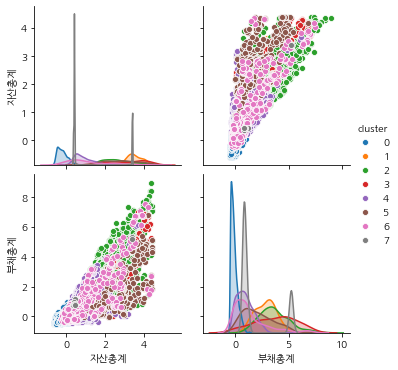

In [264]:
sns.pairplot(a, hue = "cluster")

In [257]:
X_data

무형자산      유동자산  현금및현금성자산      부채총계     비유동자산      자본총계      금융자산  \
0     -0.131289 -0.498938 -0.482767 -0.303316 -0.289398 -0.429334 -0.333590   
1     -0.169162 -0.529823 -0.423596 -0.350663 -0.291369 -0.418514 -0.322426   
2     -0.193659 -0.488148 -0.274199 -0.349110 -0.301914 -0.393614 -0.334927   
3     -0.199516 -0.492362 -0.241550 -0.360209 -0.302184 -0.388257 -0.335035   
4     -0.204271 -0.495939 -0.195594 -0.367284 -0.307117 -0.390182  0.235734   
...         ...       ...       ...       ...       ...       ...       ...   
11619  0.085123  0.230401  0.006147  0.271766 -0.294479 -0.279960 -0.283143   
11620  0.061373  0.311919  0.460895  0.330667 -0.300329 -0.263830 -0.285257   
11621  0.039191  0.294647  0.264174  0.312381 -0.302111 -0.265286 -0.261367   
11622 -0.003325  0.356463  0.946268  0.373264 -0.292282 -0.252948 -0.266542   
11623 -0.022688  0.342985  0.648409  0.359995 -0.296694 -0.257818 -0.270382   

           유형자산      자산총계      유동부채  대손충당금(유동)  대손충당금(비유동)  재고자산평가충당금  \
0     -0.096195 -0.410259 -0.346367        0.0         0.0        0.0   
1     -0.107048 -0.425954 -0.377687        0.0         0.0        0.0   
2     -0.123710 -0.411675 -0.325631        0.0         0.0        0.0   
3     -0.124039 -0.413817 -0.367446        0.0         0.0        0.0   
4     -0.431135 -0.418093 -0.360395        0.0         0.0        0.0   
...         ...       ...       ...        ...         ...        ...   
11619 -0.404438 -0.066605  0.307312        0.0         0.0        0.0   
11620 -0.404584 -0.030955  0.525038        0.0         0.0        0.0   
11621 -0.406512 -0.040087  0.498285        0.0         0.0        0.0   
11622 -0.405097 -0.005600  0.557164        0.0         0.0        0.0   
11623 -0.402212 -0.014304  0.547925        0.0         0.0        0.0   

       현재가치할인차금  cluster  
0           0.0        0  
1           0.0        0  
2           0.0        0  
3           0.0        0  
4           0.0        0  
...         ...      ...  
11619       0.0        0  
11620       0.0        0  
11621       0.0        0  
11622       0.0        0  
11623       0.0        0  

[10148 rows x 15 columns]

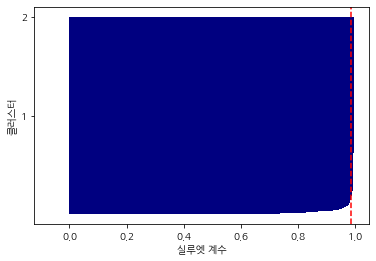

None


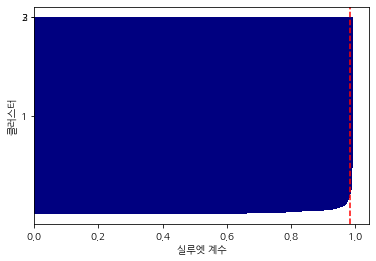

None


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


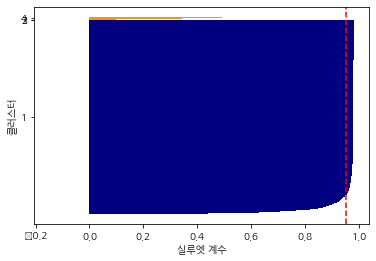

None


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


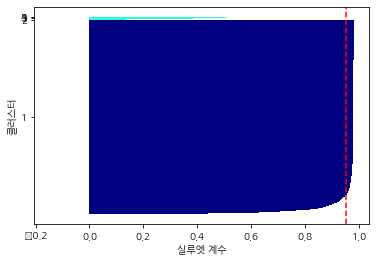

None


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


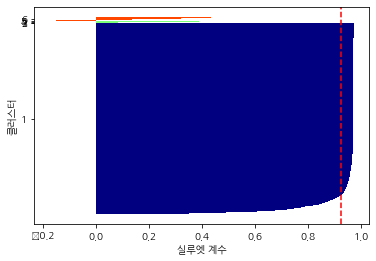

None


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


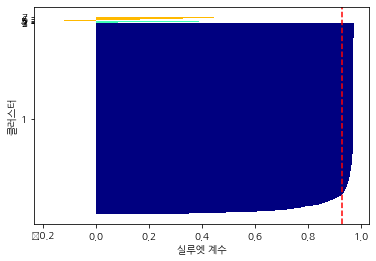

None


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


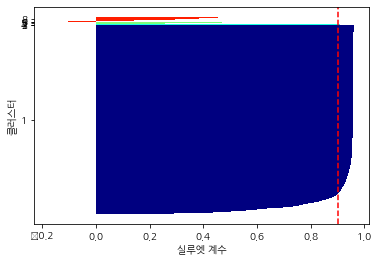

None


KeyboardInterrupt: 

In [284]:
def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric="euclidean")
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []    
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                 edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel("클러스터")
    plt.xlabel("실루엣 계수")
    plt.show()
    
    


# # 1. dataset load
# df = pd.read_csv("C:\\ITWILL\\Work\\Final_Project\\clustering\\data\\ratio_df_dropna_cluster.csv", encoding='euc-kr')
# df.drop("Unnamed: 0", axis=1, inplace=True)
# df.info()
# df = df.drop(['종목코드', '회사명', '업종', '업종명', '결산기준일', '보고서종류', 
#                '자산총계', '유동자산', '비유동자산', '부채총계', '유동부채', '비유동부채', 
#                '자본총계', '이익잉여금(결손금)'], axis=1)


# # 2. X, y(y는 아직 어떻게 설정할지 모르겠음)
# X = df.copy()
# X.drop(["회사명", "결산기준일"], axis=1, inplace=True)

# # X 정규화
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# X = ss.fit_transform(X)
# X = pd.DataFrame(X)
# X.describe()
'''
                  0             1             2
count  1.163300e+04  1.163300e+04  1.163300e+04
mean  -3.017790e-17  9.626351e-18  1.189344e-17
std    1.000043e+00  1.000043e+00  1.000043e+00
min   -1.273885e-02 -2.175222e-02 -1.166490e-02
25%   -1.257058e-02 -1.585058e-02 -1.159100e-02
50%   -1.238132e-02 -1.539452e-02 -1.148452e-02
75%   -1.167017e-02 -1.401871e-02 -1.103963e-02
max    1.078223e+02  1.076787e+02  1.078377e+02
'''

# 3. clustering_temp
n_clusters = range(2,16)

# km = KMeans(n_clusters=5, random_state=0)
# y_km = km.fit_predict(X)
# pd.DataFrame(y_km).head(30)
# pd.Series(y_km).value_counts()


for n in n_clusters :
    km = KMeans(n_clusters=n)
    y_km = km.fit_predict(df.iloc[:,9:])
    vc = pd.Series(y_km).value_counts()
    
    print(plotSilhouette(df.iloc[:,9:], y_km))



